In [2]:
import os
import cv2
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import hog
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [3]:
#Parameters for HOG
original_image_size = (48, 48)
resized_image_size = (64, 64)  # Choose a larger size for resizing
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 16
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradient = True

#Create the HOG descriptor
hog = cv2.HOGDescriptor(resized_image_size, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma,
                        histogramNormType, L2HysThreshold, gammaCorrection, nlevels, signedGradient)


In [4]:
labels = ['sad', 'happy', 'surprise', 'angry','disgust' ]
data = []
target = []

for label in labels:
    for folder in ['train', 'test']:
        for file in os.listdir(f'../../../data/image_dataset/{folder}\\{label}'):
            img = cv2.imread(f'../../../data/image_dataset/{folder}\\{label}\\{file}', 0)
            # Resize the image
            if img is not None:
                img_resized = cv2.resize(img, resized_image_size)
                features = hog.compute(img_resized)
                data.append(features.flatten())
                target.append(label)

In [5]:
X = np.array(data)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = LogisticRegression(solver="lbfgs", penalty='l2' , C=0.001 , max_iter=250)
model.fit(X_train_scaled, y_train)



LogisticRegression(C=0.001, max_iter=250)

In [7]:
y_pred = model.predict(X_test_scaled)

test_accuracy  = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {test_accuracy  * 100:.2f}%')


y_train_pred = model.predict(X_train_scaled)

# Evaluate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')




Validation Accuracy: 64.32%
Training Accuracy: 73.34%



Confusion Matrix (Testing Set):
[[ 985  406   88  325    5]
 [ 272 2179  103  146    2]
 [ 111  139  871   83    1]
 [ 427  281   93  671   10]
 [  38   25   11   64   35]]


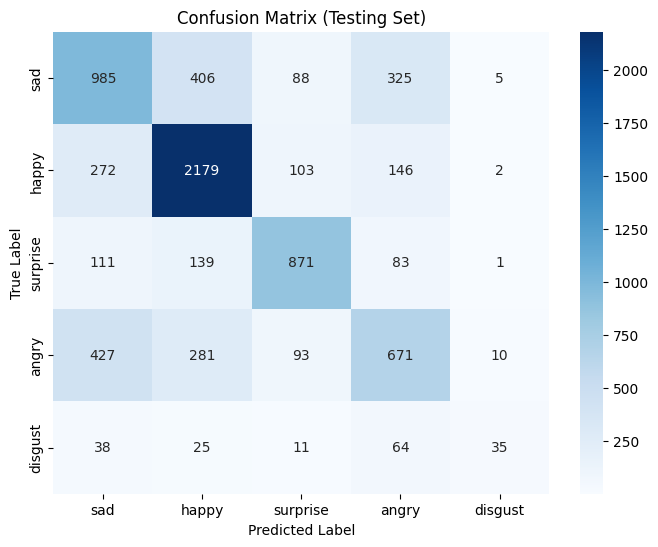

In [8]:
# Assuming you have the testing set (X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)

# Generate and print the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_pred, labels=labels)
print("\nConfusion Matrix (Testing Set):")
print(conf_matrix_test)

# Plot the confusion matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


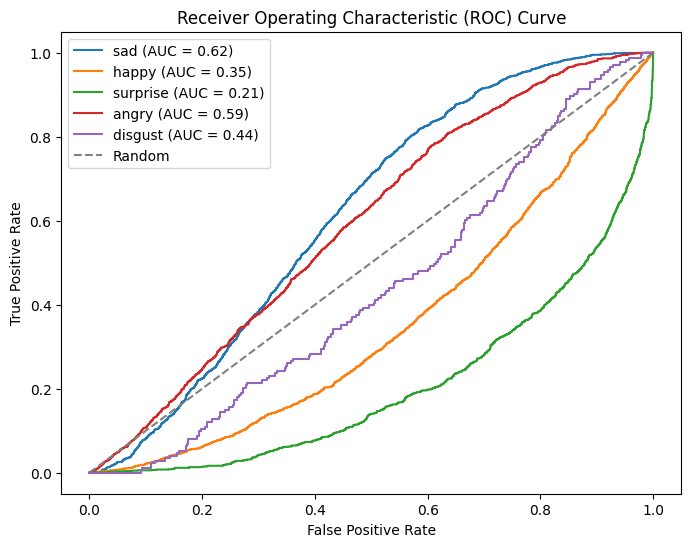

In [9]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for each class
y_prob = model.predict_proba(X_test_scaled)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_test == labels[i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit the logistic regression model with the best hyperparameters
best_logreg_model = LogisticRegression(solver="lbfgs", penalty='l2', C=0.001, max_iter=250)
best_logreg_model.fit(X_train_scaled, y_train)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(best_logreg_model.loss_curve_, marker='o', linestyle='-', color='b')
plt.title('Training Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()


c:\Users\oyoun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, verbose=1)